In [295]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

# Load Data, EDA, dan Data Cleansing

In [296]:
df=pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [297]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [298]:
# Hapus kolom Unamed:0 dan EASE-MENT
df=df.drop(['Unnamed: 0','EASE-MENT'],axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [300]:
# Cek kolom yang berisi data kategorik

for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


Dari informasi diatas terlihat kolom LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE yang seharusnya kolom dengan data numerik tetapi diidentifikasi sebagai kategorik.
Selain itu kolom SALE DATE juga dapat diubah ke format datetime.

In [301]:
# Ubah setiap kolom sesuai dengan format yang seharusnya

df_numerik = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for column in df_numerik: # coerce for missing values
    df[column] = pd.to_numeric(df[column], errors='coerce')

df_category = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for column in df_category:
    df[column] = df[column].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [302]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

- Setelah diubah ke numerik, terlihat kolom LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE memiliki baris yang kosong.

- Untuk kolom LAND SQUARE FEET (LSF) dan GROSS SQUARE FEET (GSF) kita dapat memperkirakan data dari kolom tersebut mirip satu sama lain

In [303]:
# Isi kolom LSF yang kosong dengan nilai dari kolom GSF
# Isi kolom GSF yang kosong dengan nilai dari kolom LSF

df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [304]:
# Hitung data duplikat
print(df.duplicated().sum())

# Mengurutkan data duplikat berdasarkan kolom NEIGHBORHOOD dan ADDRESS
df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD','ADDRESS',]).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [305]:
# Hapus 765 data duplikat

df.drop_duplicates(inplace=True)

In [307]:
df.dropna(inplace=True)

In [308]:
df.shape

(48453, 20)

In [322]:
df.BOROUGH.value_counts()

3    23843
4    11292
2     6994
5     5311
1     1013
Name: BOROUGH, dtype: int64

In [309]:
# Mencari Measure of Central Tendency: Mean dari kolom SALE PRICE
df['SALE PRICE'].mean()

1180256.2285720182

In [310]:
# Mencari Measure of Central Tendency: Median dari kolom SALE PRICE
df['SALE PRICE'].median()

485000.0

Dari 2 informasi diatas terlihat bahwa jarak antara rata-rata dengan median cukup jauh

In [311]:
# Mencari Measure of Central Tendency: Modus dari kolom SALE PRICE
df.BOROUGH.mode()

0    3
dtype: int64

In [312]:
# Mencari Measure of Spread: Range dari kolom SALE PRICE
print(f"{df['SALE PRICE'].max()} - {df['SALE PRICE'].min()} = {df['SALE PRICE'].max() - df['SALE PRICE'].min()}")

2210000000.0 - 0.0 = 2210000000.0


In [313]:
# Mencari Measure of Spread: Variance dari kolom BOROUGH
# Degree of Freedom = 1 karena data merupakan sample
df['SALE PRICE'].var(ddof=1)

180605546136505.6

In [314]:
df['SALE PRICE'].std()

13438956.288957324

Dari 2 informasi diatas, terlihat bahwa kolom SALE PRICE memiliki data dengan variansi dan standar deviasi yang besar

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


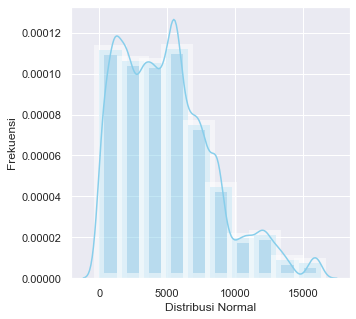

In [321]:
#Analisis distribusi data kolom BLOCK yaitu SUB BOROUGH lokasi properti yang dijual

ax = sns.distplot(
    df['BLOCK'],
    bins=10,
    kde=True,
    color='skyblue',
    hist_kws={'linewidth':10, 'alpha':.5}
)
ax.set(xlabel="Distribusi Normal", ylabel='Frekuensi');

- Terlihat dari grafik diatas, data BLOCK terdistribusi normal dengan kemiringan positif

## Confidence Interval

In [316]:
# Mencari Confidence Interval: Mean dari kolom SALE PRICE 
df.groupby("BOROUGH").agg({'SALE PRICE':[np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        1.910402e+07  8.768322e+07   1013
2        5.946771e+05  2.793509e+06   6994
3        8.410834e+05  3.951912e+06  23843
4        9.357566e+05  4.084398e+06  11292
5        5.752012e+05  2.017233e+06   5311

In [317]:
#Confidence Interval pada data BOROUGH 1
mean_fe = 3.34
sd = 2.41
n = 18102
z_score = 1.96

In [318]:
se = sd / np.sqrt(n)

In [319]:
lcb = mean_fe - z_score * se
ucb = mean_fe + z_score * se
lcb, ucb

(3.304891697339519, 3.3751083026604807)

## Hypothesis Testing

In [337]:
# Total Penjualan Properti pada tahun 2017 pada wilayah Queen
sale_2017=df[(df['SALE DATE'].dt.year == 2017) & (df.BOROUGH==4)]
total_2017=sale_2017['SALE PRICE'].sum()
total_2017

6434066021.0

In [338]:
# Total Penjualan Properti pada tahun 2016 pada wilayah Queen
sale_2016=df[(df['SALE DATE'].dt.year == 2016) & (df.BOROUGH==4)]
total_2016=sale_2016['SALE PRICE'].sum()
total_2016

4132497633.0

In [340]:
# Kenaikan penjualan dari 2016 ke 2017
kenaikan=((total_2017-total_2016)/total_2016)*100
kenaikan

55.694366758273716

In [348]:
print(f"Total data\n2017 : {sale_2017.shape}\n2016 : {sale_2016.shape}\nKenaikan : {kenaikan}%")

Total data
2017 : (7303, 20)
2016 : (3989, 20)
Kenaikan : 55.694366758273716%


In [351]:
import statsmodels.api as sm

n = 7303+3989
pnull = 0.84
phat_sample = 0.55

sm.stats.proportions_ztest(phat_sample * n, n, pnull, alternative='smaller')

(-61.94351287970989, 0.0)

Dilansir di Laporan REBNY tahun 2017 (https://www.rebny.com/content/rebny/en/research/residentialsales/4th_Quarter_2017_New_York_City_Residential_Sales_Report.html) disebutkan bahwa kenaikan penjualan properti di wilayah Queen mengalami kenaikan sebesar 84% dari tahun sebelumnya.

Sedangkan berdasarkan data diatas, kenaikan hanya terjadi sebesar 55% dari tahun sebelumnya.
Setelah dilakukan proportion z_test didapatkan p-value diatas adalah 0. Maka hipotesis alternatif dapat menggantikan hipotesis null